# Indicators of Heavy Traffic on I-94

The project focused on analyzing a dataset related to westbound traffic on the [I-94 Interstate highway](https://en.wikipedia.org/wiki/Interstate_94).

The main objective of the analysis was to identify several indicators that could explain heavy traffic on I-94. These indicators were expected to include factors such as weather conditions, time of day, and time of the week.

## The I-94 Traffic Dataset

The dataset used for the analysis was made available by John Hogue and could be downloaded from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).

### Importing required libraries

In [17]:
import pandas as pd 
# pandas is a powerful data manipulation library
import matplotlib.pyplot as plt
# matplotlib is used for plotting graphs
import seaborn as sns
# seaborn is a statistical data visualization library built on top of matplotlib

### Storing CSV in a DataFrame

In [18]:
traffic = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

### Take a peak of the dataset

In [19]:
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [20]:
traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,NaN,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [21]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


`info()` shows summary of the data in one snapshot.

The dataset contains 48,204 rows and 9 columns, where each row represents traffic and weather information recorded for a specific hour. The data covers the period from October 2, 2012, at 09:00:00 to September 30, 2018, at 23:00:00. 

According to the [dataset documentation](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume), the traffic data was collected from a station situated approximately midway between Minneapolis and Saint Paul. At this station, the route direction is westbound, meaning it records vehicles moving from east to west. Therefore, the analysis results are expected to describe westbound traffic near this station, and it is advisable not to generalize the findings to the entire I-94 highway.

### Trying to figure out what the dataset tells us

In [22]:
traffic['holiday'].value_counts()

holiday
Labor Day                    7
Christmas Day                6
Thanksgiving Day             6
Martin Luther King Jr Day    6
New Years Day                6
Veterans Day                 5
Columbus Day                 5
Memorial Day                 5
Washingtons Birthday         5
State Fair                   5
Independence Day             5
Name: count, dtype: int64

In [23]:
traffic.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


## Exploratory visualization

### Analyzing Traffic Volumes

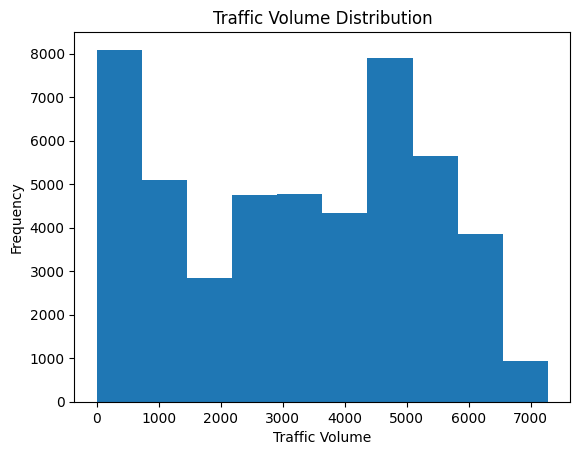

In [55]:
plt.hist(traffic['traffic_volume'])
plt.title('Traffic Volume Distribution')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.show()

In [25]:
traffic['traffic_volume'].describe()


count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Between October 2, 2012, at 09:00:00 and September 30, 2018, at 23:00:00, the hourly traffic volume was reported to range from 0 to 7,280 cars, with an average of about 3,260 cars. It was indicated that around 25 percent of the time, 1,193 cars or fewer passed the station each hour, which likely corresponds to nighttime periods or times when road construction was taking place. It was also noted that during another 25 percent of the time, the traffic volume was about four times higher, reaching 4,933 cars or more.

### Traffic Volume: Day vs. Night

The dataset was divided into two parts. Daytime data was defined as the hours from 7 AM to 7 PM, spanning 12 hours, while nighttime data was defined as the hours from 7 PM to 7 AM, also spanning 12 hours. The division does not perfectly distinguish between day and night, but it serves as a reasonable starting point.

In [26]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

day = traffic.copy()[(traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour < 19)]
print(day.shape)

night = traffic.copy()[(traffic['date_time'].dt.hour >= 19) | (traffic['date_time'].dt.hour < 7)]
print(night.shape)

(23877, 9)
(24327, 9)


### Traffic Volume: Day vs. Night (II)

After separating the data into day and night, the traffic volume histograms were analyzed side by side using a grid chart.

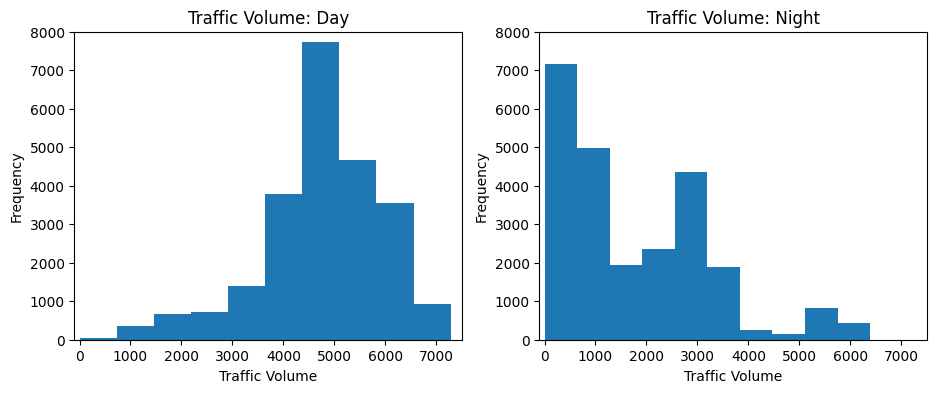

In [27]:
plt.figure(figsize=(11,4))

plt.subplot(1, 2, 1)
plt.hist(day['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Day')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.subplot(1, 2, 2)
plt.hist(night['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Night')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.show()

In [28]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [29]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The histogram for daytime traffic volume was found to be left skewed, indicating that most traffic volumes were high. It was observed that 75 percent of the time, 4,252 or more cars passed the station each hour, since only 25 percent of the values were below 4,252.

In contrast, the histogram for nighttime traffic volume showed a right-skewed distribution, meaning most traffic values were low. It was noted that 75 percent of the time, fewer than 2,819 cars passed the station each hour.

Although there were still instances where traffic exceeded 5,000 cars per hour during the night, the overall nighttime traffic level was generally light. Since the objective was to identify indicators of heavy traffic, the analysis continued by focusing exclusively on the daytime data.

### Time Indicators

One potential indicator of heavy traffic was considered to be time. It was suggested that traffic levels might increase during certain months, on specific days of the week, or at particular hours of the day.

To investigate this, several line plots were planned in order to examine how traffic volume varied by month, by day of the week, and by time of day.

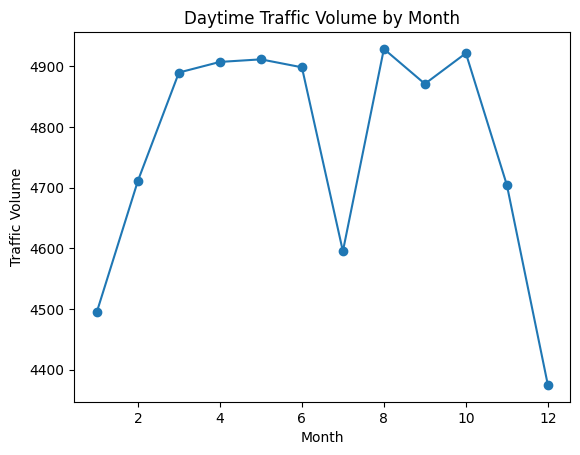

In [33]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean(numeric_only=True)
plt.plot(by_month['traffic_volume'], marker='o')
plt.title('Daytime Traffic Volume by Month')
plt.xlabel('Month')
plt.ylabel('Traffic Volume')
plt.show()

Traffic appeared to be lighter during the colder months from November to February and heavier during the warmer months from March to October, with one notable exception: July. This raised the question of whether there was something particular about July and whether traffic during this month was consistently lower each year.

To explore this, the next step involved examining how traffic volume changed each year in July.

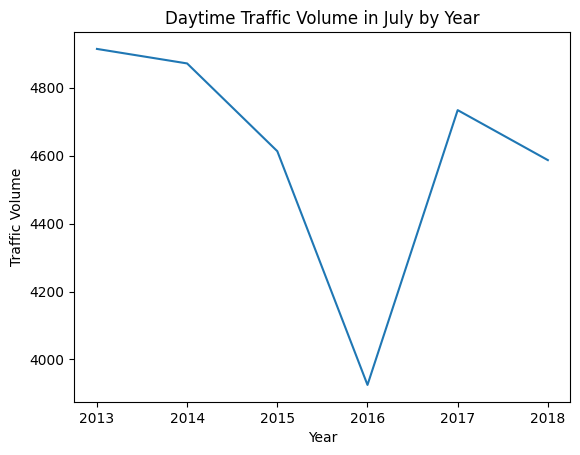

In [34]:
day['year'] = day['date_time'].dt.year
only_july = day[day['month'] == 7]
plt.plot(only_july.groupby('year').mean(numeric_only=True)['traffic_volume'])
plt.title('Daytime Traffic Volume in July by Year')
plt.xlabel('Year')
plt.ylabel('Traffic Volume')
plt.show()

It was observed that traffic was generally heavy in July, similar to other warm months. The only noticeable exception was in 2016, when traffic volume dropped significantly. A possible explanation for this decline was road construction, and [an article from 2016](https://www.crainsdetroit.com/article/20160728/NEWS/160729841/weekend-construction-i-96-us-23-bridge-work-i-94-lane-closures-i-696) was cited as supporting evidence for this idea.

As a provisional conclusion, it was suggested that warm months tend to show heavier traffic than cold months. During a warm month, the expected daytime traffic volume for each hour was estimated to be close to 5,000 cars.

### Time Indicators (II)

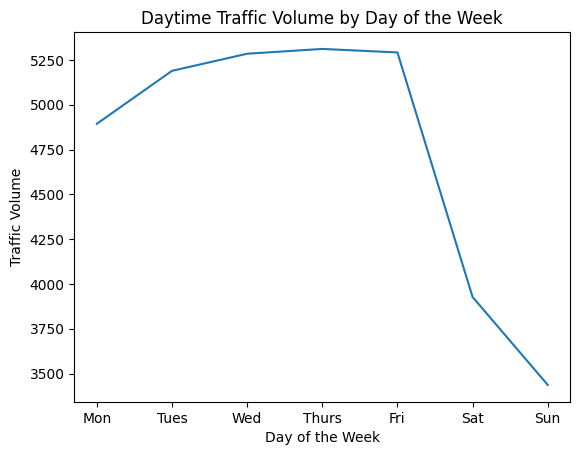

In [39]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean(numeric_only=True)
plt.plot(by_dayofweek['traffic_volume'])

days = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
plt.xticks(range(len(days)), days)

plt.title('Daytime Traffic Volume by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Traffic Volume')
plt.show()

It was observed that traffic volume was significantly heavier on business days from Monday to Friday. With the exception of Monday, values above 5,000 cars were seen only on business days. In contrast, traffic was lighter on weekends, where values generally stayed below 4,000 cars.

### Time Indicator (III)

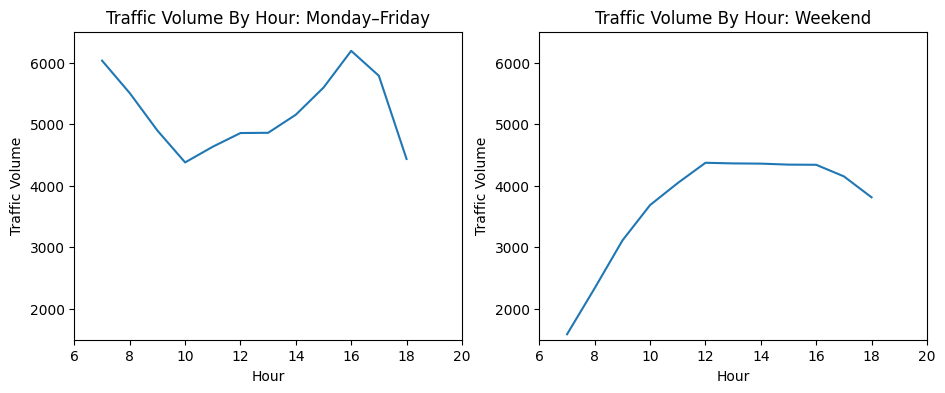

In [45]:
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 = Saturday
by_hour_business = bussiness_days.groupby('hour').mean(numeric_only=True)
by_hour_weekend = weekend.groupby('hour').mean(numeric_only=True)


plt.figure(figsize=(11,4))

plt.subplot(1, 2, 1)
by_hour_business['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume By Hour: Monday–Friday')

plt.subplot(1, 2, 2)
by_hour_weekend['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume By Hour: Weekend')

plt.show()

It was observed that at each hour of the day, traffic volume tended to be higher on business days than on weekends. As expected, the busiest times occurred around 7:00 and 16:00, when most people travel to and from work. During these periods, traffic volumes exceeded 6,000 cars.

In summary, several time-related indicators of heavy traffic were identified. Traffic was generally heavier during the warm months from March to October compared to the colder months from November to February. Business days also showed higher traffic levels than weekends. Additionally, on business days, peak traffic hours were around 7:00 and 16:00.

### Weather Indicators

#### Finding correlation 

In [47]:
day.corr(numeric_only=True)['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

In [50]:
weather_cols = ['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume']
day[weather_cols].corr(numeric_only=True)['traffic_volume'].sort_values()

clouds_all       -0.032932
snow_1h           0.001265
rain_1h           0.003697
temp              0.128317
traffic_volume    1.000000
Name: traffic_volume, dtype: float64

#### Scatter Plot

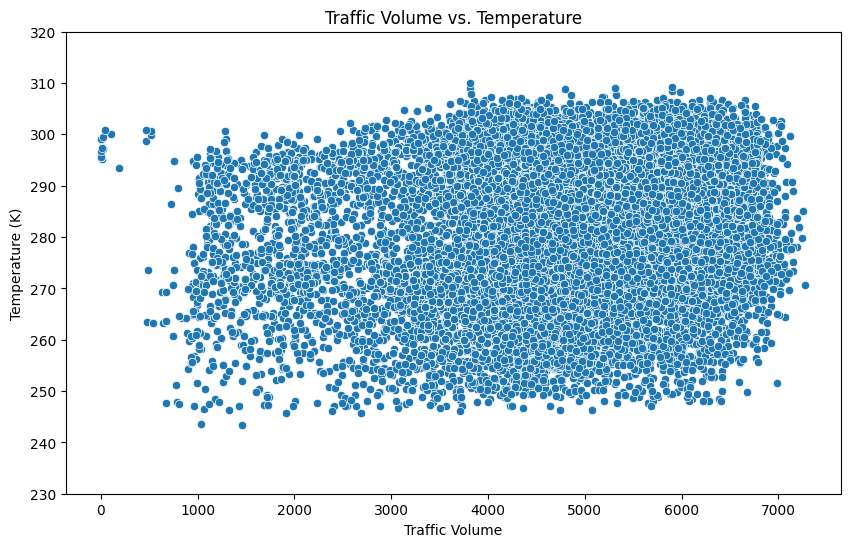

In [52]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='traffic_volume', y='temp', data=day)
plt.title('Traffic Volume vs. Temperature')
plt.xlabel('Traffic Volume')
plt.ylabel('Temperature (K)')
plt.ylim(230,320)
plt.show()

It can be stated that temperature does not appear to be a reliable indicator of heavy traffic and that the other weather-related columns, weather_main and weather_description, should be examined.

### Weather Types

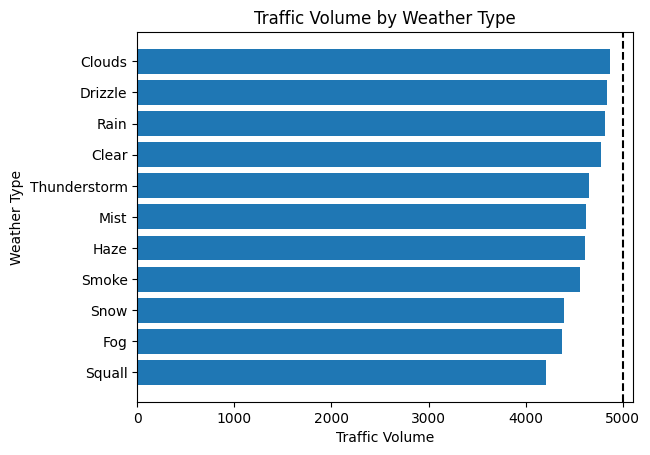

In [54]:
by_weather_main = day.groupby('weather_main').mean(numeric_only=True).sort_values('traffic_volume')
plt.barh(by_weather_main.index, by_weather_main['traffic_volume'])
plt.axvline(x=5000, linestyle='--', color='k')
plt.title('Traffic Volume by Weather Type')
plt.xlabel('Traffic Volume')
plt.ylabel('Weather Type')
plt.show()

It appears that no weather type has a traffic volume exceeding 5,000 cars, making it harder to identify a heavy traffic indicator. A more detailed analysis can be done by grouping by weather_description, which provides a more granular classification of the weather.